# <font color="#008080">ACT # 1: PCA data analysis</font>

#### Profesor: EMILIO BAROCIO ESPEJO
#### Alumno: Ortega Camargo Fernando
#### Actividad 1

Fecha: 07-02-24

***Objective:*** A descriptive statistical is used in this HW. Graphical representation
from data base are obtained to carry out an EDAV&amp;V.  

***Data set description:*** The assembly of a driveshaft for an automobile requires
the circle welding of tube yokes to a tube. The inputs to the automated welding
machines must be controlled to be within certain operating limits where a machine
produces welds of good quality. In order to control the process, one process
engineer measured four critical variables: Voltage (X1), Current (X2) , Feed speed
(X3 ) and Gas flow (X4)

***Instructions:***  
1. Download the dataset from google classroom, DAT_AUTOM.xls, corresponding to activity 1 (ACT#1).

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.decomposition import PCA

Importamos el DF

In [1]:
import pandas as pd

data = pd.read_excel(r"C://Users//ortca//MCD//Metodos_Multivariados//bases//DAT_AUTOM.xlsx")

***2. Plot the  dataset: Boxplot, Histogram Plot, Andrews curve***

In [4]:
# Descripción rapida
data.head(5)

,Numero,Voltage,Current,Feed speed,Gas flow
0,1,23.0,276,289.6,51.0
1,2,22.0,281,289.0,51.7
2,3,22.8,270,288.2,51.3
3,4,22.1,278,288.0,52.3
4,5,22.5,275,288.0,53.0


In [36]:
data.dtypes

Numero          int64
Voltage       float64
Current         int64
Feed speed    float64
Gas flow      float64
dtype: object

In [48]:
data["Voltage"].value_counts()  # hay un dato atipico negativo, lo transformamos

Voltage
22.0    6
22.3    5
22.1    4
22.5    4
22.2    4
22.8    3
21.8    3
22.6    3
23.0    2
22.7    2
22.9    1
21.3    1
21.7    1
21.9    1
Name: count, dtype: int64

In [47]:
data.loc[data["Voltage"] < 0, "Voltage"] = data.loc[data["Voltage"] < 0, "Voltage"] * -1

In [5]:
## datos generales de estructura

print(f"Dimension de la base : {data.shape}")
print("###Columnas:")
print(list(data.columns))

Dimension de la base : (40, 5)
###Columnas:
['Numero', 'Voltage', 'Current', 'Feed speed', 'Gas flow']


In [7]:
data.info()   # informacion general de estructura, nulos, y tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Numero      40 non-null     int64  
 1   Voltage     40 non-null     float64
 2   Current     40 non-null     int64  
 3   Feed speed  40 non-null     float64
 4   Gas flow    40 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.7 KB


In [8]:
data.describe(include="all")    #análisis estadístico rápido

,Numero,Voltage,Current,Feed speed,Gas flow
count,40.000000,40.000000,40.00000,40.00000,40.000000
mean,20.500000,21.172500,271.07500,288.43500,51.975000
std,11.690452,7.060471,10.05724,1.10999,0.961503
min,1.000000,-22.300000,217.00000,286.00000,51.000000
25%,10.750000,22.000000,269.00000,287.92500,51.000000
50%,20.500000,22.200000,273.00000,288.50000,52.000000
75%,30.250000,22.600000,276.00000,289.00000,52.075000
max,40.000000,23.000000,283.00000,290.20000,55.300000


### Gráficos

####  <font color="grey">BoxPlot</font>

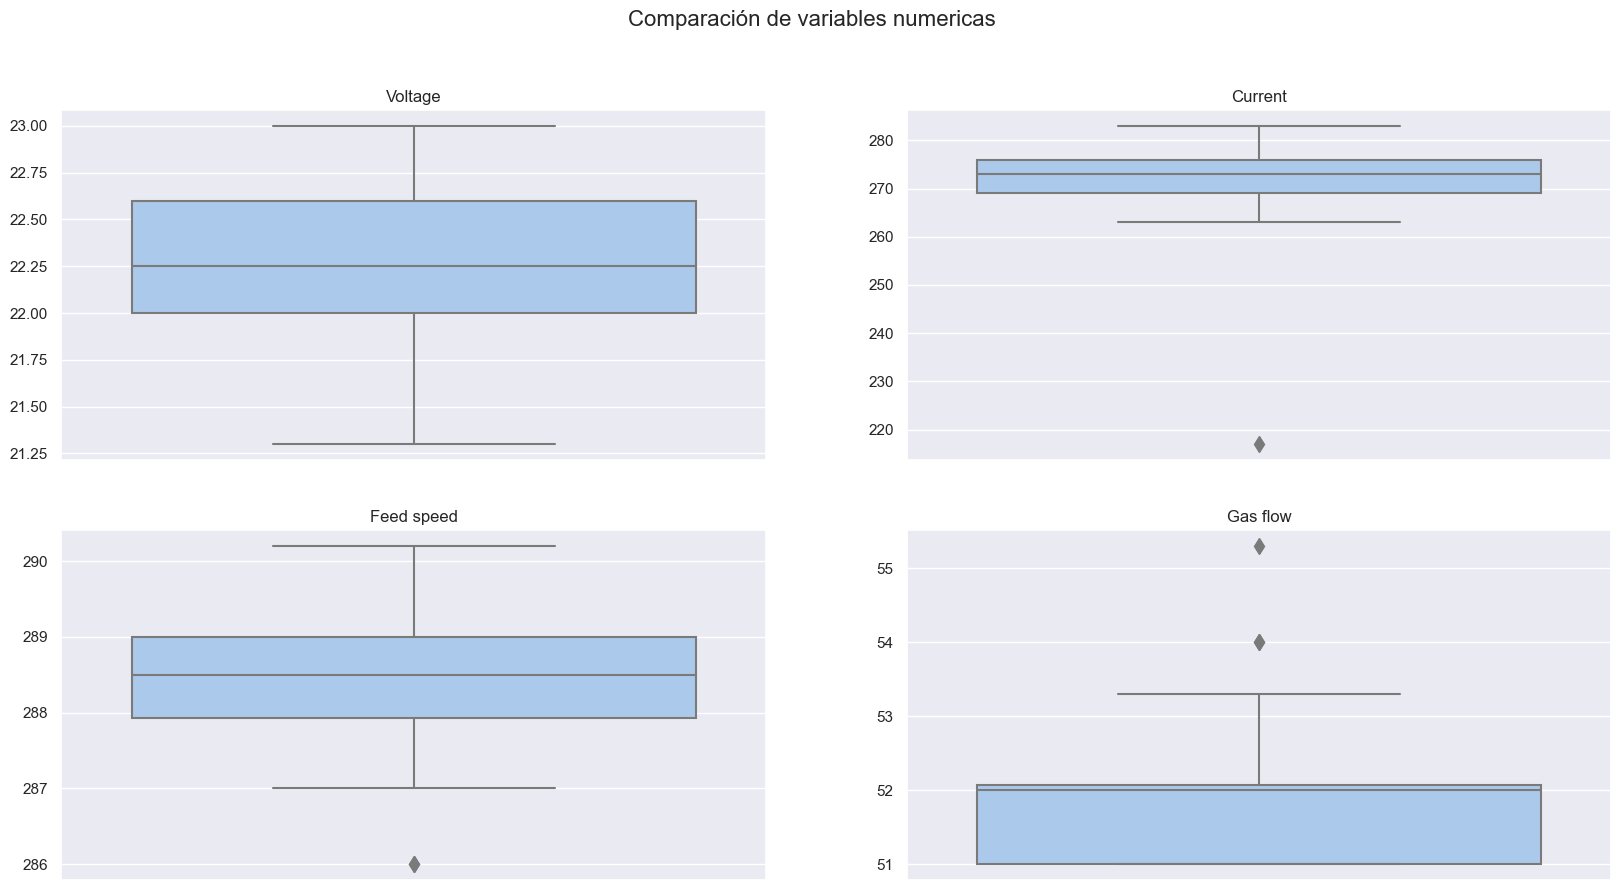

In [49]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))   #definimos el grid de gráficos asi como tamaño

# Boxplot 1
sns.boxplot(data=data, y="Voltage", palette="pastel",linewidth=1.5,fliersize=8, ax=axes[0, 0])
axes[0, 0].set_title('Voltage')
axes[0, 0].set_ylabel('')
axes[0, 0].set_xlabel('')

# Boxplot 2
sns.boxplot(data=data, y="Current", palette="pastel",linewidth=1.5, fliersize=8, ax=axes[0, 1])
axes[0, 1].set_title('Current')
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')

# Boxplot 3
sns.boxplot(data=data,y="Feed speed", palette="pastel",linewidth=1.5, fliersize=8, ax=axes[1, 0])
axes[1, 0].set_title('Feed speed')
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlabel('')

# Boxplot 4
sns.boxplot(data=data,y="Gas flow", palette="pastel",linewidth=1.5, fliersize=8, ax=axes[1, 1])
axes[1, 1].set_title('Gas flow')
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('')

# Agregaamos título al gráfico múltiple
fig.suptitle('Comparación de variables numericas', fontsize=16)

plt.show()

#### Histográma

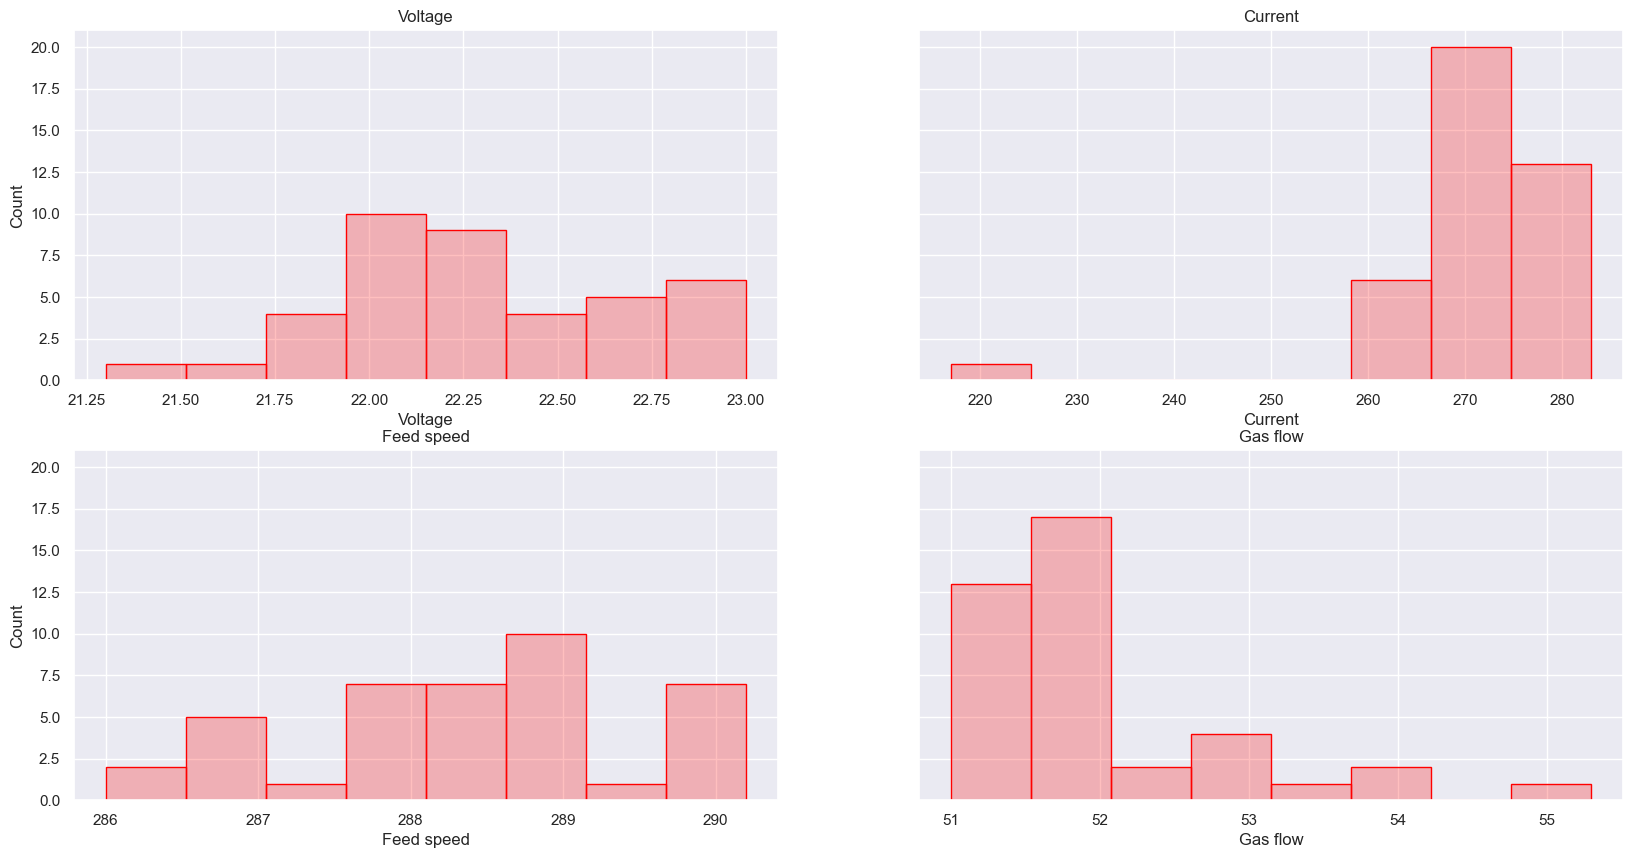

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10),sharey=True)  #definimos el grid de gráficos asi como tamaño

# set de Histogramas 1
sns.histplot(data=data,x="Voltage",bins=8,alpha=.25,color="red",ax=axes[0, 0],edgecolor="red")
axes[0, 0].set_title('Voltage')



# set de Histogramas 2
sns.histplot(data=data,x="Current",bins=8,alpha=.25,color="red",ax=axes[0, 1],edgecolor="red")
axes[0, 1].set_title('Current')



# set de Histogramas 1
sns.histplot(data=data,x="Feed speed",bins=8,alpha=.25,color="red",ax=axes[1, 0],edgecolor="red")
axes[1, 0].set_title('Feed speed')


# set de Histogramas 1
sns.histplot(data=data,x="Gas flow",bins=8,alpha=.25,color="red",ax=axes[1, 1],edgecolor="red")
axes[1, 1].set_title('Gas flow')





plt.show()




### scatter

C:\Users\ortca\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ortca\AppData\Local\Temp\ipykernel_10668\1449344442.py:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


<Figure size 4000x1500 with 0 Axes>

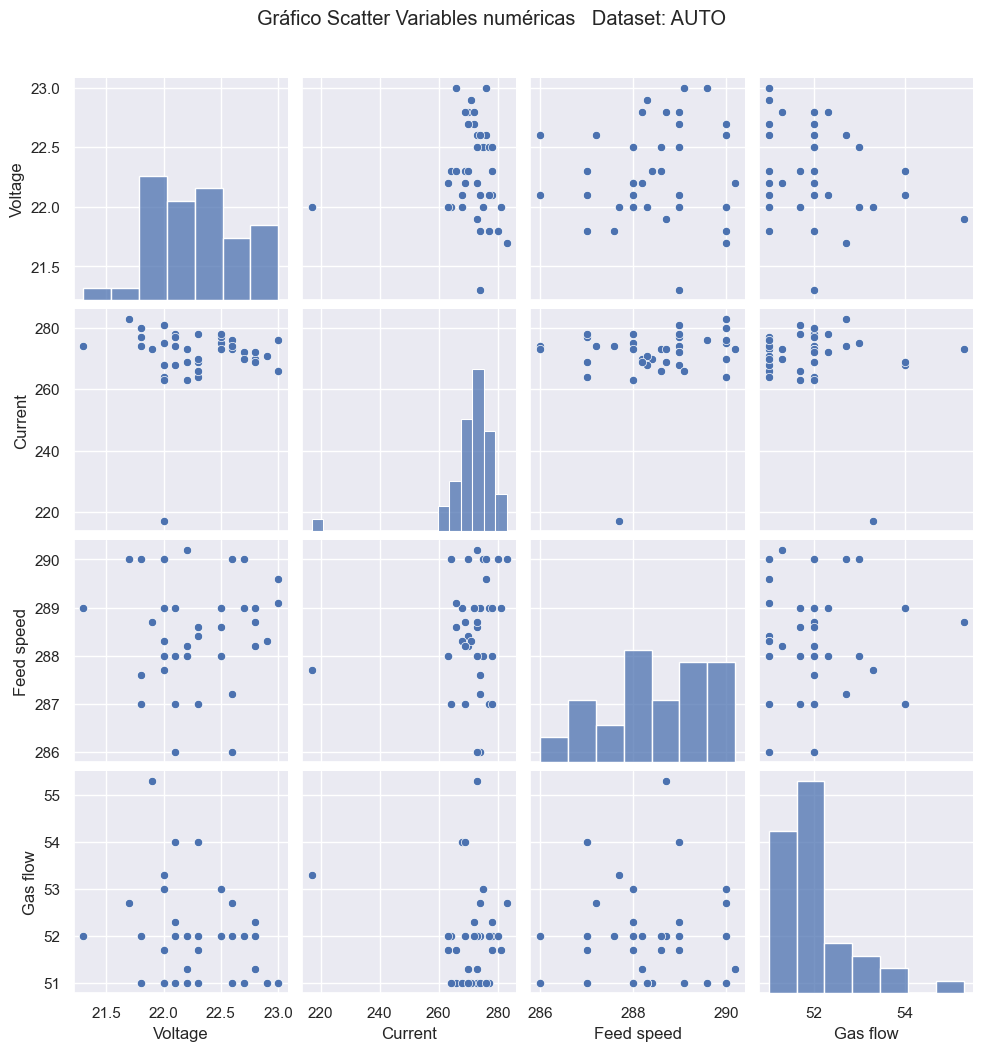

In [54]:
plt.figure(figsize=(40,15))  #definimos el grid de gráficos asi como tamaño

sns.pairplot(data.iloc[:,1:])                         #graficaremos todas las variables numéricas y asignaremos un hue por categoría
plt.suptitle("Gráfico Scatter Variables numéricas   Dataset: AUTO",y=1.05)



fig.tight_layout()

plt.show()

##### curva de andrews

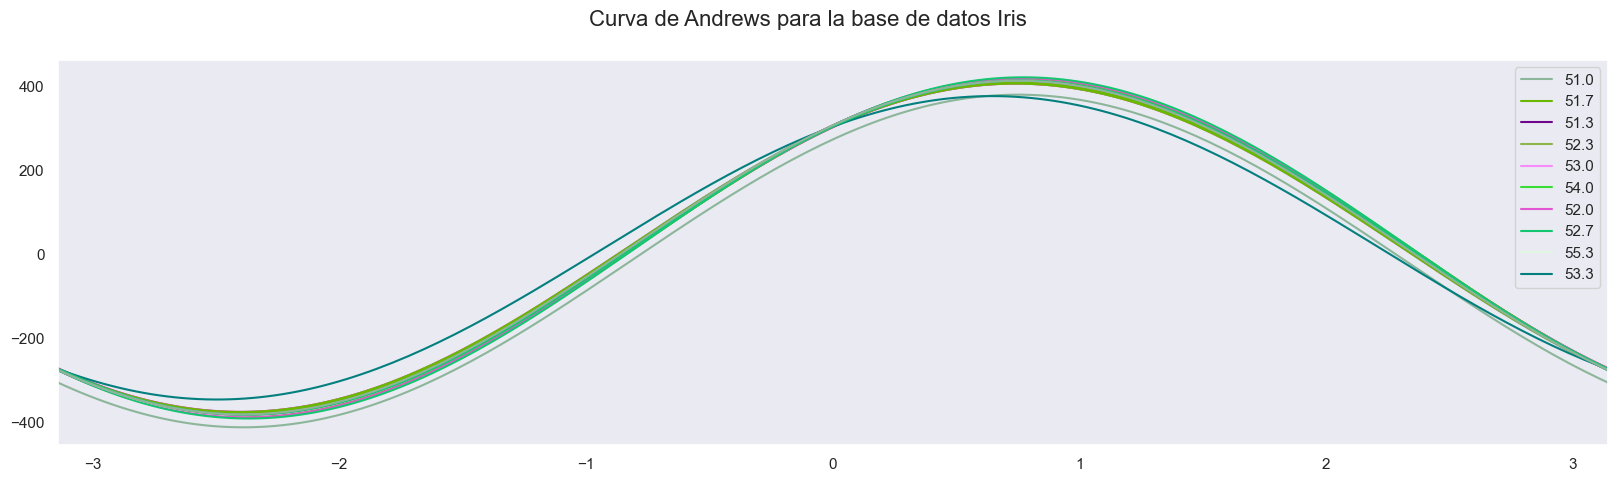

In [31]:
plt.figure(figsize=(20,5))

# Creamos la curva de Andrews
x = pd.plotting.andrews_curves(data.iloc[:,1:],"Gas flow")
  

# graficamos curva
x.plot()

# Agregamos título al gráfico 
plt.suptitle('Curva de Andrews para la base de datos Iris', fontsize=16)

  
# Display
plt.show()

***3. Apply PCA algorithm to process the pointed out dataset:***

***Compute the eigenvalues and eigenvectors of the covariance matrix***
* Compute the explained variance and select N components
* Scatter plot: original data, data after subtracting mean and transformed data
* Reconstruct the original data

Guardamos Data sin indices

In [58]:
pca_data=data.iloc[:,1:]

Vemos las correlaciones iniciales

In [60]:
### correlacion

pca_data.corr()

,Voltage,Current,Feed speed,Gas flow
Voltage,1.000000,0.008151,0.035657,-0.257830
Current,0.008151,1.000000,0.145840,-0.155184
Feed speed,0.035657,0.145840,1.000000,-0.073637
Gas flow,-0.257830,-0.155184,-0.073637,1.000000


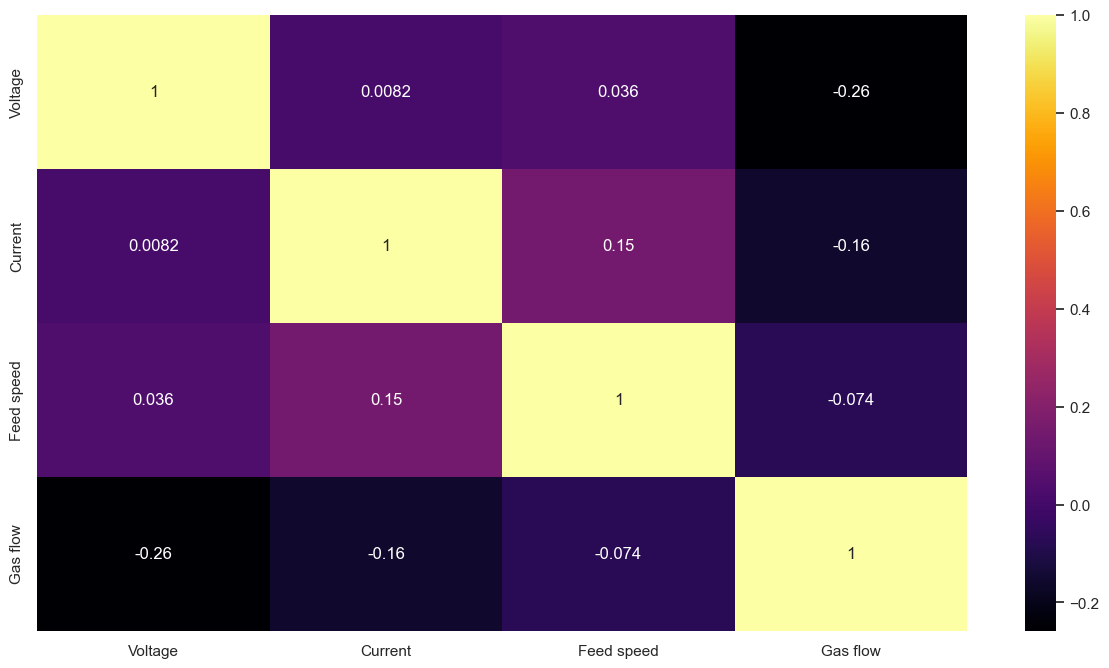

In [62]:
sns.set(rc={"figure.figsize":(15,8)})

sns.heatmap(pca_data.corr(),annot=True, cmap="inferno")

plt.show()

Estandarizamos nuestra data

In [ ]:


mean= np.mean(x , axis=0)
std = np.std(x , axis=0)

In [66]:
estandar_data = (pca_data-np.mean(pca_data , axis=0))/np.std(pca_data, axis=0)

Validamos que la matriz no cambie 

In [69]:
### correlacion

cov=estandar_data.corr()

In [113]:
cov

,Voltage,Current,Feed speed,Gas flow
Voltage,1.000000,0.008151,0.035657,-0.257830
Current,0.008151,1.000000,0.145840,-0.155184
Feed speed,0.035657,0.145840,1.000000,-0.073637
Gas flow,-0.257830,-0.155184,-0.073637,1.000000


Calculamos valores propios y vectores propios de la matriz de Cov

In [70]:

eigenvalues, eigenvectores = np.linalg.eig(cov)

In [121]:
eigenvalues=eigenvalues[np.argsort(eigenvalues)[::-1]]

Ordenamos de mayor a menor

In [122]:
sorted_eigenvectores = eigenvectores[:, np.argsort(eigenvalues)[::-1]]

Visualizamos la varianza explicada por cada componente

In [123]:
# varianza explicada

sum_eig_val = np.sum(eigenvalues)
explained_variance = eigenvalues/ sum_eig_val
print(explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[0.33878164 0.26798284 0.21804916 0.17518636]
[0.33878164 0.60676448 0.82481364 1.        ]


Transformamos nuestros datos, producto entre matriz estandarizada @ eigenvectores

In [126]:
## Transformamos la data

no_pc=4    #testeamos con el numero de componentes que necesitemos, usé 4 para comprobar la reconstrucción
new_data=np.dot(estandar_data,sorted_eigenvectores[:,:no_pc])

C:\Users\ortca\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ortca\AppData\Local\Temp\ipykernel_10668\763980478.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


<Figure size 4000x1500 with 0 Axes>

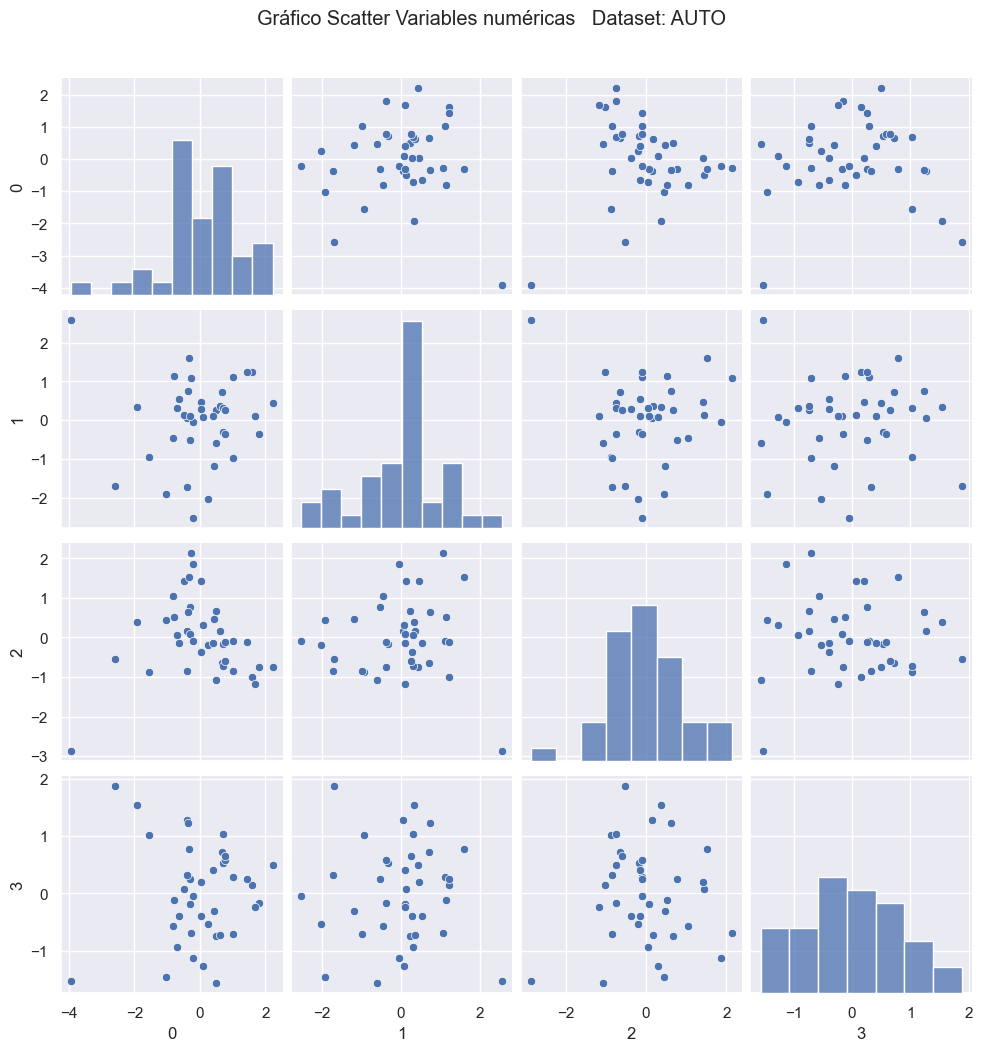

In [127]:
## grafico de correlacion con los 4 componentes
plt.figure(figsize=(40,15))  #definimos el grid de gráficos asi como tamaño

sns.pairplot(pd.DataFrame(new_data) )                       #graficaremos todas las variables numéricas y asignaremos un hue por categoría
plt.suptitle("Gráfico Scatter Variables numéricas   Dataset: AUTO",y=1.05)



fig.tight_layout()

plt.show()

### Data Original

Necesitamos multiplicar nuestra data transformada por la transpuesta de los eigenvectores. Adicional si se estandarizo hay que multiplicar por su varianza y sumar su media.

In [175]:
Original=pd.DataFrame(((np.dot(new_data, sorted_eigenvectores.T)*np.array(np.std(pca_data, axis=0))+np.array(np.mean(pca_data, axis=0)))))

In [178]:
Original  #Corroboramos la reconstrucción

,0,1,2,3
0,23.0,276.0,289.6,51.0
1,22.0,281.0,289.0,51.7
2,22.8,270.0,288.2,51.3
3,22.1,278.0,288.0,52.3
4,22.5,275.0,288.0,53.0
5,22.2,273.0,288.0,51.0
6,22.0,275.0,290.0,53.0
7,22.1,268.0,289.0,54.0
8,22.5,277.0,289.0,52.0
9,22.5,278.0,289.0,52.0
